##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Quickstart with Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/python_quickstart"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.2 MB/s eta 0:00:00


### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a> method:

In [ ]:
%%time
response = model.generate_content("What generative AI could help me at work?")

CPU times: user 114 ms, sys: 8.81 ms, total: 122 ms
Wall time: 7.86 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> The meaning of life is a deeply personal and philosophical question that has been pondered by humans for centuries. There is no one definitive answer that satisfies everyone, and the meaning of life can vary greatly depending on individual beliefs, values, and experiences. Some common perspectives on the meaning of life include:
> 
> 1. **Purpose and Fulfillment:** Some people believe that the meaning of life is to find a purpose or calling that brings fulfillment and satisfaction. This could involve pursuing a career, raising a family, engaging in creative or intellectual activities, or contributing to society in some way.
> 
> 2. **Happiness and Well-being:** Others believe that the meaning of life is to be happy and content. This involves finding ways to experience joy, gratitude, and a sense of peace and well-being.
> 
> 3. **Relationships and Connection:** For many people, the meaning of life is found in their relationships with others. They believe that having strong connections with family, friends, and loved ones brings meaning and purpose to their existence.
> 
> 4. **Personal Growth and Development:** The meaning of life can also be found in personal growth and development. By challenging oneself, learning new things, and pushing beyond comfort zones, individuals can feel a sense of accomplishment and purpose.
> 
> 5. **Contribution to the World:** Some believe that the meaning of life is to make a positive impact on the world. This could involve helping others, advocating for causes, or simply living a life that inspires and uplifts others.
> 
> 6. **Experiencing the Present Moment:** For some, the meaning of life is to live in the present moment and appreciate the beauty and wonder of life. They believe that by focusing on the here and now, rather than dwelling on the past or worrying about the future, they can find meaning and fulfillment.
> 
> 7. **Religious or Spiritual Beliefs:** Many people find meaning and purpose in their religious or spiritual beliefs. They believe that life is part of a larger divine plan or purpose, and that their actions and choices have consequences in an afterlife or spiritual realm.
> 
> Ultimately, the meaning of life is a personal journey that each individual must explore and define for themselves. There is no right or wrong answer, and the meaning of life can evolve and change over time as we grow and gain new experiences.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/ai/generativelanguage/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [ ]:
response.candidates

[content {
  parts {
    text: "The meaning of life is a deeply personal and philosophical question that has been pondered by humans for centuries. There is no one definitive answer that satisfies everyone, and the meaning of life can vary greatly depending on individual beliefs, values, and experiences. Some common perspectives on the meaning of life include:\n\n1. **Purpose and Fulfillment:** Some people believe that the meaning of life is to find a purpose or calling that brings fulfillment and satisfaction. This could involve pursuing a career, raising a family, engaging in creative or intellectual activities, or contributing to society in some way.\n\n2. **Happiness and Well-being:** Others believe that the meaning of life is to be happy and content. This involves finding ways to experience joy, gratitude, and a sense of peace and well-being.\n\n3. **Relationships and Connection:** For many people, the meaning of life is found in their relationships with others. They believe that 

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [ ]:
%%time
response = model.generate_content("What generative AI could help me at work?", stream=True)

CPU times: user 109 ms, sys: 13.1 ms, total: 122 ms
Wall time: 7.03 s


In [ ]:
for chunk in response:
  print(chunk.parts)
  print("_"*80)

[text: "**General-Purpose Tools:**\n\n* **ChatGPT:** Assist with writing,"
]
________________________________________________________________________________
[text: " brainstorming, summarizing, and customer support.\n* **DALL-E 2:** Generate unique images and graphics for presentations, marketing campaigns, and design inspiration"
]
________________________________________________________________________________
[text: ".\n* **CoPilot by GitHub:** Offer code suggestions, fix errors, and generate entire functions in various programming languages.\n\n**Task-Specific Tools:**\n\n**Content Creation:**\n\n* **Jasper:** Create high-quality marketing copy, blog posts, and website content.\n* **Copy.ai:** Generate"
]
________________________________________________________________________________
[text: " persuasive emails, ad campaigns, and social media posts.\n* **Rytr:** Assist with writing headlines, articles, scripts, and other content formats.\n\n**Data Analysis and Visualization:**\n\n

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What generative AI could help me at work?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like <code>text</code> do not:

In [ ]:
try:
  response.resolve()
except Exception as e:
  print(f'{type(e).__name__}: {e}')

## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
!curl -o gemini.jpg https://mspoweruser.com/wp-content/uploads/2023/12/Google-Gemini-AI-model.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28440  100 28440    0     0   186k      0 --:--:-- --:--:-- --:--:--  186k


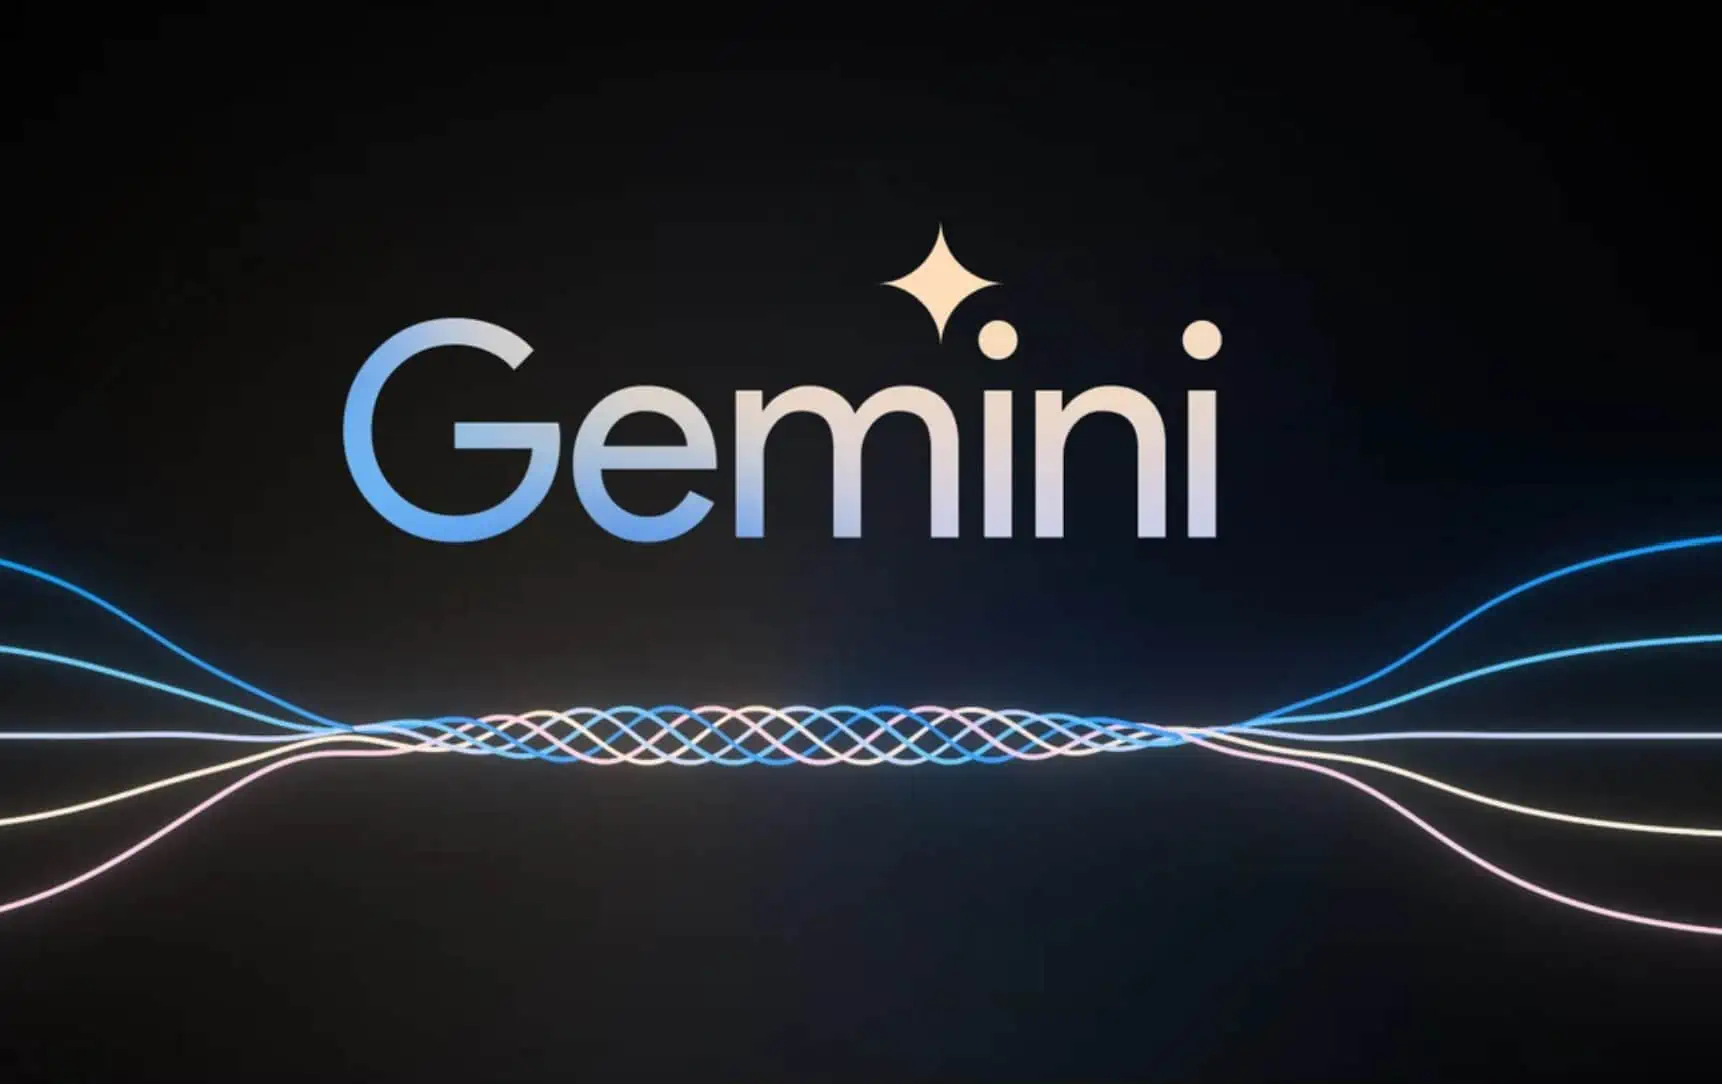

In [ ]:
import PIL.Image

img = PIL.Image.open('gemini.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  These are glass containers with compartments filled with white rice, orange bell peppers, broccoli, and pieces of chicken.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  Meal prepping can be a great way to save time and money, and it can also help you to eat healthier. This meal is a great example of a healthy and delicious meal that can be easily prepped ahead of time.
> 
> This meal features brown rice, roasted vegetables, and chicken teriyaki. The vegetables are roasted in a simple olive oil and salt mixture, and the chicken is marinated in a teriyaki sauce made with soy sauce, brown sugar, and garlic. The whole meal is then packed into individual containers for easy grab-and-go breakfasts or lunches.
> 
> This meal is not only healthy and delicious, but it is also very versatile. The vegetables can be swapped out for any of your favorites, and the chicken can be replaced with tofu or tempeh for a vegetarian option. The teriyaki sauce can also be adjusted to your liking, so feel free to add more or less soy sauce, brown sugar, or garlic.
> 
> If you're looking for a healthy and delicious meal that can be easily prepped ahead of time, this meal is a great option. It is packed with nutrients and flavor, and it is sure to keep you feeling full and satisfied.
> 
> Here are some tips for meal prepping:
> 
> * Choose healthy and nutritious recipes that you enjoy eating.
> * Cook in bulk so that you have leftovers for the week.
> * Use fresh, seasonal ingredients whenever possible.
> * Store your meals in airtight containers in the refrigerator or freezer.
> * Label your containers so that you know what is inside.
> * Reheat your meals gently so that they do not become overcooked.
> 
> Meal prepping can be a great way to save time, money, and eat healthier. With a little planning and effort, you can easily create delicious and nutritious meals that will make your life easier.

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
    ),
    history=[]
)

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> Computers are like magic boxes that can store your special words, pictures, and games, and they can show them back to you whenever you want.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "Computers are like magic boxes that can store your special words, pictures, and games, and they can show them back to you whenever you want."
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

At its core, a computer is a machine that can be programmed to carry out
________________________________________________________________________________
 a set of instructions. It consists of hardware, which are the physical components like the processor, memory, and storage devices, and software, which are the instructions
________________________________________________________________________________
 that tell the hardware what to do. When you give a computer a command, the processor fetches the necessary instructions from memory and executes them, manipulating data in memory and producing output. The computer's operating system manages the hardware and software resources, providing a user-friendly interface and essential services like file management and multitasking
________________________________________________________________________________
.

Here's a simplified analogy: Imagine a computer as a chef. The hardware is the kitchen, with all the tools and ingredients the chef 

`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: Computers are like magic boxes that can store your special words, pictures, and games, and they can show them back to you whenever you want.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components like the processor, memory, and storage devices, and software, which are the instructions that tell the hardware what to do. When you give a computer a command, the processor fetches the necessary instructions from memory and executes them, manipulating data in memory and producing output. The computer's operating system manages the hardware and software resources, providing a user-friendly interface and essential services like file management and multitasking.
> 
> Here's a simplified analogy: Imagine a computer as a chef. The hardware is the kitchen, with all the tools and ingredients the chef needs. The software is the recipe book, which tells the chef what steps to take to create a dish. When you give the computer a command, it's like giving the chef the name of a dish. The chef (processor) then follows the recipe (software) to gather the ingredients (data) from the pantry (memory), mix them together, and cook them (execute instructions) to create the desired dish (output). The operating system is like the kitchen manager, making sure the chef has everything they need and that the kitchen runs smoothly.

## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `glm.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [ ]:
model.count_tokens("What generative AI could help me at work?")

total_tokens: 9

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 314

## Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What generative AI could help me at work?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.007734748, -0.06454937, 0.0030081936, -0.00059 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What generative AI could help me at work?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[-0.004827467, -0.042599276, -0.0010075559, 0.0125 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0),
        stream=True
)

In [ ]:
response.resolve()
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> Once upon a time, in a quaint little town nestled amidst rolling hills, there...

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[0.05054815, 0.0017576581, -0.0030949702, -0.00946 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "Computers are like magic boxes that can store your special words, pictures, and games, and they can show them back to you whenever you want."
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components like the processor, memory, and storage devices, and software, which are the instructions that tell the hardware what to do. When you give a computer a command, the processor fetches the necessary instructions from memory and executes them, manipulating data in memory and producing output. The computer\'s operating system manages the hardware and software resources, providing a user-friendly interface and essential services like file mana

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.033640105, 0.004234081, -0.015073028, 0.023007 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.00331003, -0.019143622, 0.002191121, 0.0179653 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
response = model.generate_content('How to become Hitler?')
response.candidates

[content {
  parts {
    text: "To become Hitler is impossible. Hitler was a German politician and leader of the Nazi Party, responsible for the Holocaust and the Second World War. He is widely regarded as one of the most evil and destructive figures in history. It is not possible or desirable to emulate such a person."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
response = model.generate_content('How to become Hitler?',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"It is not possible to become Hitler. Hitler was a unique individual who came to power in a specific historical context. His rise to power was the result of a complex set of factors, including the economic and political instability of Germany in the wake of World War I, the weakness of the Weimar Republic, and the appeal of Hitler's own message of nationalism and anti-Semitism."

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

Underlying the Python SDK is the <a href="https://ai.google.dev/api/python/google/ai/generativelanguage"><code>google.ai.generativelanguage</code></a> client library:

In [ ]:
import google.ai.generativelanguage as glm

The SDK attempts to convert your message to a `glm.Content` object, which contains a list of `glm.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`glm.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('gemini.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Apple's New Gemini App: What You Need to Know
> 
> Apple has announced a new app called Gemini. The app... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a magic box with a brain called the processor. It's like your brain, but it can think really fast!
> 
> The brain needs information, like when you press the keys on the keyboard. It reads this information like a book and stores it in its memory, like a library.
> 
> The brain then uses this information to make things happen on the screen, like showing pictures, playing games, or letting you write stories.
> 
> Finally, the brain has a way to communicate with the outside world through the mouse, speakers, and printer. It sends messages like, "Play this music" or "Print this picture."
> 
> And that's how a computer works, just like your brain but super fast and with a magic screen where you can see what it's thinking!

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of several essential components that work together to process, store, and display information:
> 
> **1. Processor (CPU):**
>    - The brain of the computer.
>    - Executes instructions and performs calculations.
>    - Speed measured in gigahertz (GHz).
>    - More GHz generally means faster processing.
> 
> **2. Memory (RAM):**
>    - Temporary storage for data being processed.
>    - Holds instructions and data while the program is running.
>    - Measured in gigabytes (GB).
>    - More GB of RAM allows for more programs to run simultaneously.
> 
> **3. Storage (HDD/SSD):**
>    - Permanent storage for data.
>    - Stores operating system, programs, and user files.
>    - Measured in gigabytes (GB) or terabytes (TB).
>    - Hard disk drives (HDDs) are traditional, slower, and cheaper.
>    - Solid-state drives (SSDs) are newer, faster, and more expensive.
> 
> **4. Graphics Card (GPU):**
>    - Processes and displays images.
>    - Essential for gaming, video editing, and other graphics-intensive tasks.
>    - Measured in video RAM (VRAM) and clock speed.
> 
> **5. Motherboard:**
>    - Connects all the components.
>    - Provides power and communication pathways.
> 
> **6. Input/Output (I/O) Devices:**
>    - Allow the user to interact with the computer.
>    - Examples: keyboard, mouse, monitor, printer.
> 
> **7. Operating System (OS):**
>    - Software that manages the computer's resources.
>    - Provides a user interface and basic functionality.
>    - Examples: Windows, macOS, Linux.
> 
> When you run a program on your computer, the following happens:
> 
> 1. The program instructions are loaded from storage into memory.
> 2. The processor reads the instructions from memory and executes them one by one.
> 3. If the instruction involves calculations, the processor performs them using its arithmetic logic unit (ALU).
> 4. If the instruction involves data, the processor reads or writes to memory.
> 5. The results of the calculations or data manipulation are stored in memory.
> 6. If the program needs to display something on the screen, it sends the necessary data to the graphics card.
> 7. The graphics card processes the data and sends it to the monitor, which displays it.
> 
> This process continues until the program has completed its task or the user terminates it.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [ ]:
model = genai.GenerativeModel('gemini-pro')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0),
        stream=True
)

response.resolve()
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> In the quaint little town of Willow Creek, there lived a young girl named Anya...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).